<a href="https://colab.research.google.com/github/clare-shea/phys1110/blob/main/2_Distinguishability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tutorial 3: Distinguishability
Developed by Rebeckah Fussell for Cornell Physics Labs.
Modified by Abigail Crites for SP-23-PHYS1110.

In this tutorial we will continue to apply the concepts of mean, standard deviation, and standard uncertainty of the mean. We will also learn about how to compare the means of different data sets and test for distinguishability.

Before we get started, let's load some packages and define the functions for standard deviation and standard uncertainty of the mean. These functions are identical to the ones in the previous tutorial.

Make sure to run the cell below before proceeding (SHIFT + ENTER). As always, remember code cells build on each other, so run each in order. Additionally, do not change the names of any variables already given to you. This will cause the autograder to throw an error and require you to fix your homework submission.

In [ ]:
%matplotlib inline
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
%run "/content/drive/My Drive/Colab Notebooks/utilities2.ipynb"

Mounted at /content/drive/


## Part 1: Distinguishability

Often we need to determine if two sets of measurements represent the same underlying phenomenon. For example, in class, we measured the period of the pendulum when starting and stopping the stopwatch at the turning point and at the lowest point. In this scenario, we want to know if these two measurements are systematically different: is one an overestimate? an underestimate?

Even if we are measuring the same phenomena, we would still expect to see some difference in the two data sets based on random variability. What we want to know is whether the two sets of measurements are distinguishable or not: given the expected variability, I can tell the difference between these two sets of measurements?

To estimate the distinguishability, a quantitative method should:

1. Take into account the difference between the means of the two data sets, such that a larger difference means the values are more distinguishable (I can tell them apart).
2. Take into account the uncertainty of the means of the two data sets, such that the difference in the means is balanced by how well we know the measurements.
3. Not depend on units (so we can use the same criteria to distinguish all kinds of data).


To make comparisons between two sets of measurements with uncertainties $A \pm \delta_A$ and $B \pm \delta_B$, we use a quantity known as $t'$, which we define as:

$$t' = |\frac{A-B}{\sqrt{\delta_A^2 + \delta_B^2}}|$$

$A$ and $B$ might be the means for two sets of repeated measurements, such as our means of repeated measurements of the period of pendula when measured from the turning point and from the lowest point. $\delta$ should be read as "uncertainty in", so $\delta_A$ and $\delta_B$ are the uncertainties in the measurements A and B (*not* the uncertainty times the measurements).


### 1.a)  Briefly map the parts of the formula for $t^\prime$ to the three properties above. 

Answer: A and B are the two data sets. The numerator is the difference between the sets. The denominator is the square root of the sum of the uncertainties of the two data sets.

### 1.b) Say we measure A = 2 ± 1 s and B = 8 ± 1 s. Intuitively, would you say that A and B are distinguishable (I can tell them apart) or indistinguishable (I can't tell them apart)?

Answer: Yes, I would say they're distinguishable

### 1.c) What about if the uncertainties were larger: are A= 2 ± 5 s and B= 8 ± 5 s distinguishable? 

Answer: No, I would say they weren't

### 1.d) Run the code below to calculate the $t^\prime$ value for these two sets of measurements, filling in the ... with the measurements from 1.c).  

In [ ]:
# an example of using t_prime
t_a = t_prime(2,1,8,1)

# second example
t_b = t_prime(2,5,8,5)

print("The t' for a is " + str("%.4f" % t_a))
print("The t' for b is " + str("%.4f" % t_b))

The t' for a is 4.2426
The t' for b is 0.8485


## Part 2: Exploring $t^\prime$
You can think of $t^\prime$ as telling us how far apart the measurements are in "units" of uncertainty.  The larger the $t^\prime$ value, the more we can tell the measurements apart, given our uncertainty. 

Below, we have two sets of measurements (one in blue and one in orange).  They each have a mean (``m1`` and ``m2``), number of measurements (``N1`` and ``N2``), and a standard deviation (``stdev1`` and ``stdev2``).  

### 2.a) Run the code below and change the values of the means, number of measurements, and standard deviations. 

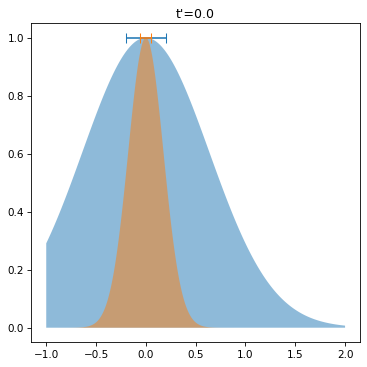

In [ ]:
%matplotlib inline
m1=0 #change me!
m2=0 #change me!
N1=20 #change me!
N2=20 #change me!
stdev1=.9 #change me!
stdev2=.25 #change me!

fig, ax=plt.subplots(1,1, figsize=(5,5), dpi=75)
ax.cla()
x=np.linspace(-1, 2, 1000)
ax.fill_between(x,np.e**(-(x-m1)**2/stdev1**2),alpha=.5)
ax.fill_between(x,np.e**(-(x-m2)**2/stdev2**2), alpha=.5)
ax.errorbar(m1, 1, xerr=stdev1/np.sqrt(N1), capsize=5)
ax.errorbar(m2, 1, xerr=stdev2/np.sqrt(N2), capsize=5)
ax.set_title("t'={}".format(round((m1-m2)/np.sqrt(stdev1**2/N1+stdev2**2/N2), 3)))
fig.canvas.draw_idle() 
plt.tight_layout()   
fig.show()       

### 2.b) What happens when you change the values of the means, standard deviations, and N?

Answer: Changing the means separates the curves. Changing stdv changes how wide the curve is. Changing N changes the width of the error bars.

## Part 3: Interpreting $t^\prime$ values

If we have two sets of measurements of the same physical phenomenon, we would expect to see a $t^\prime$ value of approximately 1 on average. If $t^\prime \approx 1$, then: 

$$|A-B| \approx \sqrt{\delta_A^2 + \delta_B^2}$$

This would mean that the difference between the two sets of measurements is around the size of the uncertainty in those measurements. 

### 3.a) Given that the uncertainty represents how much we expect our data to vary, why do we say that a $t^\prime \approx 1$ means the two sets of measurements may be measuring the same physical phenonemon? 

Answer: because due to human and measurement error, the same data set can be recorded by different measurements.


After calculating $t^\prime$ for two measurements, you can evaluate their distinguishability through the following interpretation:


1.  $t^\prime\approx1$  The measurements are indistinguishible and they may represent the same physical phenomenon.   

2.  $t^\prime<<1$  The measurements are indistinguishable, and it is possible that either we overestimated our uncertainties or that our current level of precision is not good enough to distinguish the phenomenon that we are trying to measure.  

3.  $1\lesssim t^\prime<3$  This is a grey area.  Our two measurements may come from the same phenomenon, but it is less likely than if our $t^\prime$ is somewhere close to 1. 

4.  $t^\prime >3$ The measurements are distinguishable and it is unlikely that they represent the same phenomena.


NOTE: $|t^\prime| \le 1$ **does not** mean that A and B are the same. It only tells us that the given data cannot distinguish (tell the difference between) the two sets. For example, if you do a better measurement and decrease the uncertainties, you might later uncover a difference between A and B. That is, poor precision may be hiding a subtle difference!

### 3.b)  Based on these interpretations and your exploration above, what do you think we should do next in each of these 4 scenarios?

1. $t'\approx1$: conclude that the data are from the same set



2. $t'<<1$: perform the experiment using tools with a higher level of precision

3. $1\lesssim t'<3$: perform the experiment again

4. $t' >3$: conclude the data are from different sets

## Part 4: Example Problem

Let's try an example problem. An experimenter measured the period of a pendulum at 10 degrees and 20 degrees using a simple stopwatch. They measured the time for the pendulum to swing for one single period and conducted 14 trials for each angle. The data they collected is given in the first lines of code below. The code then generates a histogram so we can visualize the distribution of our data. 

### 4.a) Run the code cell below. 

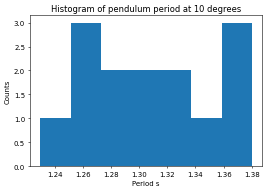

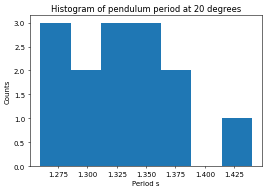

In [ ]:
#enter pendulum period data
plt.figure(dpi=50)
ten_degs = np.array([1.23, 1.36, 1.35, 1.36, 1.30, 1.27, 1.30, 1.32, 1.26, 1.26, 1.38, 1.29, 1.29, 1.32])
twenty_degs = np.array([1.37, 1.35, 1.38, 1.27, 1.33, 1.33, 1.26, 1.36, 1.36, 1.27, 1.29, 1.44, 1.29, 1.32])

#plot distributions
plt.hist(ten_degs,bins = 7)
plt.title("Histogram of pendulum period at 10 degrees")
plt.ylabel('Counts')
plt.xlabel('Period s')

plt.figure(dpi=50);
plt.hist(twenty_degs,bins = 7)
plt.title("Histogram of pendulum period at 20 degrees")
plt.ylabel('Counts')
plt.xlabel('Period s')
plt.show()

### 4.b) Calculate standard deviation of the 10 degree data set. *Hint: replace the dots with the name of the ten degree data array as it was defined in the previous cell.*

In [ ]:
stdev_10deg = std_dev(ten_degs)
print("The standard deviation is " + str("%.4f" % stdev_10deg))

The standard deviation is 0.0443


### 4.c) Calculate standard deviation of the 20 degree data set.

In [ ]:
stdev_20deg = std_dev(twenty_degs)
print("The standard deviation is " + str("%.4f" % stdev_20deg) + "s")

The standard deviation is 0.0510s


### 4.d)  The stopwatch reads to the nearest 0.01s, so the rounding uncertainty is 0.005s. Based on the data, is the dominant source of uncertainty in this measurement due to the **instrumental precision** or the variability between repeated trials? 

Answer: variability between trials

---

### 4.e)  Calculate the uncertainty in a <u>*single*</u> trial of each set of measurements for the period of this pendulum from: i) ten degrees and ii) twenty degrees. 
#### Hint: you will need to call one of the functions defined above (``std_dev()``, ``std_unc()``, or ``t_prime()``).

In [ ]:
unc_single_10deg = std_unc(ten_degs)
unc_single_20deg = std_unc(twenty_degs)
print("Ten degrees: The uncertainty in a single trial is " + str("%.4f" % unc_single_10deg) + " s")
print("Twenty degrees: The uncertainty in a single trial is " + str("%.4f" % unc_single_20deg) + " s")

Ten degrees: The uncertainty in a single trial is 0.0118 s
Twenty degrees: The uncertainty in a single trial is 0.0136 s


### 4.f)  Calculate the mean of each set of measurements of the period of this pendulum, including its uncertainty, from: i) ten degrees and ii) twenty degrees. We've provided a template, and you have to replace each ... with the relevant variable name or function call. 

In [ ]:
#edit two lines below
mean_10 = np.mean(ten_degs)
unc_10 = std_unc(ten_degs)
print("Ten degrees: mean is " + str("%.4f" % mean_10) + " +/- " + str("%.4f" % unc_10) + " s")

Ten degrees: mean is 1.3064 +/- 0.0118 s


In [ ]:
#edit two lines below
mean_20 = np.mean(twenty_degs)
unc_20 = std_unc(twenty_degs)

print("Twenty degrees: mean is " + str("%.4f" % mean_20) + " +/- " + str("%.4f" % unc_20) + " s")



Twenty degrees: mean is 1.3300 +/- 0.0136 s


### 4.g) Calculate the $t^\prime$ between the measurements of the period of this pendulum when released from 10 degrees and 20 degrees. Replace the ... in the ``t_prime`` call with the relevant uncertainties and the ... in the ``print`` call with your interpretation of the t' value. 

In [ ]:
t_p = t_prime(mean_10, unc_10, mean_20, unc_20)
print("The t' value is " + str(t_p) + "which means the two measurements are quite similar")

The t' value is 1.3056170041744388which means the two measurements are quite similar


## Using t' in your own data analysis

The rest of the code below gives you a template to start analyzing your data in Unit 1 Session 2. 

In [ ]:
#calculate mean and uncertainty in the mean for your 10 degree measurements:
data_tenone = np.array([1.69, 1.81, 1.83, 1.82, 1.91, 1.85, 1.84, 1.80, 1.91, 1.70])
mean_tenone = np.mean([1.69, 1.81, 1.83, 1.82, 1.91, 1.85, 1.84, 1.80, 1.91, 1.70])
unc_tenone = std_unc([1.69, 1.81, 1.83, 1.82, 1.91, 1.85, 1.84, 1.80, 1.91, 1.70])
print("mean 10 degrees part 1 is : " + str(mean_tenone) + " +/- " + str(unc_tenone))

#second trial
data_tentwo = np.array([17.88, 17.84, 17.91])
mean_tentwo = np.mean([17.88, 17.84, 17.91])
unc_tentwo = std_unc([17.88, 17.84, 17.91])
print("mean 10 degrees part 2 is : " + str(mean_tentwo) + " +/- " + str(unc_tentwo))

#CABLE trial 10 degrees
data_tencable = np.array([1.76, 1.61, 1.59, 1.68, 1.63, 1.66, 1.63, 1.63, 1.58, 1.66,])
mean_tencable = np.mean([1.76, 1.61, 1.59, 1.68, 1.63, 1.66, 1.63, 1.63, 1.58, 1.66,])
unc_tencable = std_unc([1.76, 1.61, 1.59, 1.68, 1.63, 1.66, 1.63, 1.63, 1.58, 1.66,])
print("mean 10 degrees with cable is : " + str(mean_tencable) + " +/- " + str(unc_tencable))
print("uncertainty cable 10" + str(unc_tencable))


#calculate mean and uncertainty in the mean for your 20 degree measurements:
data_twentyone = np.array([1.61, 1.89, 1.89, 1.89, 1.81, 1.81, 1.82, 1.74, 1.98, 1.79])
mean_twentyone = np.mean([1.61, 1.89, 1.89, 1.89, 1.81, 1.81, 1.82, 1.74, 1.98, 1.79])
unc_twentyone = std_unc([1.61, 1.89, 1.89, 1.89, 1.81, 1.81, 1.82, 1.74, 1.98, 1.79])
print("mean 20 degrees part 1 is : " + str(mean_twentyone) + " +/- " + str(unc_twentyone))

#second trial
data_twentytwo = np.array([17.9, 18.02, 17.95])
mean_twentytwo = np.mean([17.9, 18.02, 17.95])
unc_twentytwo = std_unc([17.9, 18.02, 17.95])
print("mean 20 degrees part 2 is : " + str(mean_twentytwo) + " +/- " + str(unc_twentytwo))
print("uncertainty twentytwo 20" + str(unc_twentytwo))

#CABLE trial 20 degrees
data_twentycable = np.array([1.71, 1.59, 1.68, 1.64, 1.64, 1.64, 1.64, 1.66, 1.66, 1.59])
mean_twentycable = np.mean([1.71, 1.59, 1.68, 1.64, 1.64, 1.64, 1.64, 1.66, 1.66, 1.59])
unc_twentycable = std_unc([1.71, 1.59, 1.68, 1.64, 1.64, 1.64, 1.64, 1.66, 1.66, 1.59])
print("mean 20 degrees with cable is : " + str(mean_twentycable) + " +/- " + str(unc_twentycable))
print("uncertainty cable 20" + str(unc_twentycable))

#are they distinguishable?
tp10 = t_prime(mean_tenone, unc_tenone, mean_twentyone, unc_twentyone)
print("t prime for trial 1 is : " + str(tp10))
tp20 = t_prime(mean_tentwo, unc_tentwo, mean_twentytwo, unc_twentytwo)
print("t prime for trial 2 is : " + str(tp20))
tpc10 = t_prime(mean_twentycable, unc_twentycable, mean_tencable, unc_tencable)
print("t prime for CABLES is : " + str(tpc10))


mean 10 degrees part 1 is : 1.816 +/- 0.02339040639046511
mean 10 degrees part 2 is : 17.876666666666665 +/- 0.02027587510099412
mean 10 degrees with cable is : 1.643 +/- 0.016333333333333325
uncertainty cable 100.016333333333333325
mean 20 degrees part 1 is : 1.8229999999999997 +/- 0.031939178309892534
mean 20 degrees part 2 is : 17.956666666666667 +/- 0.034801021696368784
uncertainty twentytwo 200.034801021696368784
mean 20 degrees with cable is : 1.645 +/- 0.011571036638473173
uncertainty cable 200.011571036638473173
t prime for trial 1 is : 0.17682055504058522
t prime for trial 2 is : 1.9862541326457153
t prime for CABLES is : 0.09991677068886824


Save your notebook with all your answers to the questions, modified code cells, and output from each code cell. Submit your notebook by uploading it to the Gradescope assignment. Make sure it is named <span style='font-family:Courier'>2_Distinguishability.ipynb</span> before submitting.